In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
X_train = pickle.load(open('../Data/X_train.pkl', 'rb'))
X_test = pickle.load(open('../Data/X_test.pkl', 'rb'))
y_train = pickle.load(open('../Data/y_train.pkl', 'rb'))
y_test = pickle.load(open('../Data/y_test.pkl', 'rb'))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(329, 20530)
(83, 20530)
(329,)
(83,)


In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.1, 0.5, 1.0]
}

ada = AdaBoostClassifier(random_state=42)

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=2)

In [6]:
print("Best parameters: ", grid_search.best_params_)
print("Train accuracy: ", grid_search.best_score_)
print("Test accuracy: ", grid_search.score(X_test, y_test))

Best parameters:  {'learning_rate': 1.0, 'n_estimators': 200}
Train accuracy:  0.9453433416736169
Test accuracy:  0.927710843373494


In [7]:
best_model = grid_search.best_estimator_
best_model

AdaBoostClassifier(n_estimators=200, random_state=42)

In [8]:
grid_search.cv_results_

{'mean_fit_time': array([112.28133599, 226.20367352, 345.17779001, 579.73640426,
        118.77217309, 234.33077089, 344.38011845, 580.17036144,
        114.52028362, 233.86250575, 336.56276091, 384.27455632]),
 'std_fit_time': array([ 0.75209211,  1.55703464,  4.74155064,  2.24912395,  2.32952189,
         2.50238714,  2.40806005,  4.77646632,  2.11714147,  4.33862807,
        20.10197774, 31.40091754]),
 'mean_score_time': array([ 1.95578098,  5.38269687,  6.74633853, 10.23244842,  2.24116381,
         5.15139246,  6.46629723, 10.45200364,  2.22610005,  4.43413178,
         5.04363664,  5.36016488]),
 'std_score_time': array([0.01883722, 0.3278498 , 0.33363815, 0.18009726, 0.08448084,
        0.61836316, 0.12950585, 0.2499949 , 0.23579889, 0.35426054,
        0.83351372, 0.35776172]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0,
                    1.0],
              mask=[False, False, False, False, False, False, False, False,
  

In [9]:
from sklearn.metrics import accuracy_score

y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.927710843373494


In [10]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_test)
print("AUC Score:", auc_score)

AUC Score: 0.8838619402985075


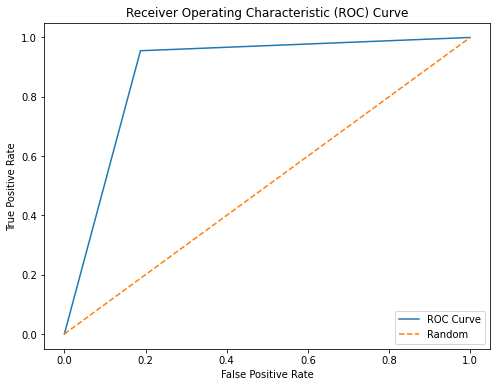

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[13  3]
 [ 3 64]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.96      0.96      0.96        67

    accuracy                           0.93        83
   macro avg       0.88      0.88      0.88        83
weighted avg       0.93      0.93      0.93        83



In [13]:
dict = {
    'Model': grid_search.best_estimator_,
    'Best Parameters': grid_search.best_params_,
    'Training Set Accuracy': grid_search.best_score_,
    'Test Set Accuracy': test_accuracy,
    'AUC Score': auc_score
}

# save the dictionary to a pickle file
import pickle

with open('adaboost_all_dim.pkl', 'wb') as f:
    pickle.dump(dict, f)

In [14]:
import pickle

dct = pickle.load(open('adaboost_all_dim.pkl', 'rb'))
dct

{'Model': AdaBoostClassifier(n_estimators=200, random_state=42),
 'Best Parameters': {'learning_rate': 1.0, 'n_estimators': 200},
 'Training Set Accuracy': 0.9453433416736169,
 'Test Set Accuracy': 0.927710843373494,
 'AUC Score': 0.8838619402985075}